1. Import the libraries needed.

In [494]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

2. Load the funding data in “nih-Worldwide2015.xls” into a DataFrame and visualize the first 5 rows. Display the dtypes of the columns. (5 points)

In [497]:
# Load "noh-Worldwide2015.xls" data
file_path = 'nih-Worldwide2015.xls'
nih_data = pd.read_excel(file_path)

# Display first 5 rows
display(nih_data.head())

# Display column data types
print(nih_data.dtypes)

,Organization Name,Project Number,Funding Mechanism,NIH Reference,PI Name,Project Title,DEPT NAME,NIH Dept Combining Name,NIH MC Combining Name,Direct Cost,...,Funding,Congressional District,City,State or Country Name,Zip Code,Attributed to Medical School,Medical School Location,Institution Type,Award Notice Date,FOA
0,"21ST CENTURY THERAPEUTICS, INC.",5R43GM109528-02,RPGs - SBIR/STTR,8860204,"SHAW, JIAJIU",Development of a Novel ELISA Kit for Screening...,NaN,NONE,UNAVAILABLE,NaN,...,335740,13.0,DETROIT,MICHIGAN,48220,NaN,NaN,NaN,2015-05-08,PA11-335
1,"21ST CENTURY THERAPEUTICS, INC.",1R43AT008202-01A1,RPGs - SBIR/STTR,8832837,"CHEN, BEN D.",Novel Compounds from Sycamore Leaves for the T...,NaN,NONE,UNAVAILABLE,NaN,...,303745,13.0,DETROIT,MICHIGAN,48220,NaN,NaN,NaN,2015-08-10,PA14-071
2,"2B TECHNOLOGIES, INC.",2R44ES024031-02,RPGs - SBIR/STTR,8977721,"BIRKS, JOHN W",Personal Exposure Monitoring of the Air Pollut...,NaN,NONE,UNAVAILABLE,NaN,...,499734,2.0,BOULDER,COLORADO,NaN,NaN,NaN,NaN,2015-07-20,PA14-071
3,3-C INSTITUTE FOR SOCIAL DEVELOPMENT,271201400075C-1-0-0,R&D Contracts,9041442,"SANCHEZ, REBECCA",IGF::OT::IGF : ARISE: AN ONLINE RELAPSE PREVE...,NaN,NONE,UNAVAILABLE,NaN,...,70112,4.0,DURHAM,NORTH CAROLINA,27513,NaN,NaN,NaN,NaT,NaN
4,3-C INSTITUTE FOR SOCIAL DEVELOPMENT,2R44DA035014-02,RPGs - SBIR/STTR,8981102,"MCMILLEN, JANEY STURTZ",Web-based Tool for the Dissemination of Eviden...,NaN,NONE,UNAVAILABLE,NaN,...,562731,4.0,DURHAM,NORTH CAROLINA,27513,NaN,NaN,NaN,2015-09-08,PA14-071


Organization Name                       object
Project Number                          object
Funding Mechanism                       object
NIH Reference                            int64
PI Name                                 object
Project Title                           object
DEPT NAME                               object
NIH Dept Combining Name                 object
NIH MC Combining Name                   object
Direct Cost                            float64
Indirect Cost                          float64
Funding                                  int64
Congressional District                 float64
City                                    object
State or Country Name                   object
Zip Code                                object
Attributed to Medical School            object
Medical School Location                 object
Institution Type                        object
Award Notice Date               datetime64[ns]
FOA                                     object
dtype: object

3. Show the projects that are attributed to a medical school. (10 points)

In [500]:
# Filter projects that are attributed to a medical school
projects = nih_data[nih_data['Attributed to Medical School'].notna()]

# Display records from 'Attributed to Medical School' column
medical_school = projects[['Attributed to Medical School']]
print(medical_school.head())

    Attributed to Medical School
231                            Y
232                            Y
233                            Y
234                            Y
236                            Y


4. Parse activity and institution codes according to the instructions below and store them as two new columns: ‘code’ (activity code) and ‘icode’ (institution code). (20 points)

In [503]:
# Function to parse 'code' (activity code)
def extract_code(project_number):
    if isinstance(project_number, str) and len(project_number) >= 6:
        return project_number[1:4]  # Extract second to fourth characters
    return None

# Function to parse 'icode' (institution code)
def extract_icode(project_number):
    if isinstance(project_number, str) and len(project_number) >= 6:
        return project_number[4:6]  # Extract fifth and sixth characters
    return None

# Apply 'code' and 'icode' functions to new columns
nih_data['code'] = nih_data['Project Number'].apply(extract_code)
nih_data['icode'] = nih_data['Project Number'].apply(extract_icode)

# Display new columns
print(nih_data[['code', 'icode']].head())

  code icode
0  R43    GM
1  R43    AT
2  R44    ES
3  712    01
4  R44    DA


5. Keep only records where the activity code starts with a letter in the English alphabet. e.g. Records with activity code ‘R43’ should be kept. But records with ‘712’ should not since it does not contain any characters in the alphabet. (10 points)

In [506]:
# Filter records where 'code' starts with A-Z
code_a_z = nih_data[nih_data['code'].str.match(r'^[A-Za-z]', na=False)]

# Display the number of records (verify 50,173 records)
print(f"Number of records: {code_a_z.shape[0]}")

# Display first 5 rows
print(code_a_z[['code', 'icode']].head())

Number of records: 50173
  code icode
0  R43    GM
1  R43    AT
2  R44    ES
4  R44    DA
5  R44    MD


6. Find the 10 NIH institutes that gave the most funding. (15 points)

In [509]:
# Group by 'icode'and sum the 'Funding' column
top_10_institutes = code_a_z.groupby('icode')['Funding'].sum().nlargest(10)

# Display top 10 NIH institutes
print(top_10_institutes)

icode
CA    3067378774
AI    2816658845
GM    2305153448
HL    2275682842
DK    1594835858
NS    1339911506
MH    1161677004
AG     999538398
HD     971449006
DA     832033498
Name: Funding, dtype: int64


7. Find the 10 Principal Investigators with the most number of grants. (15 points)

In [512]:
# Group by 'PI Name' and count number of grants
top_10_pi = code_a_z['PI Name'].value_counts().nlargest(10)

# Display top 10 Principal Investigators
print(top_10_pi)

PI Name
WOODLAND, DAVID L.       42
STEWART, DAVID J.        30
KAPLAN, DAVID L          12
CALIGIURI, MICHAEL A.    10
WANG, TIMOTHY CRAGIN     10
SHARPLESS, NORMAN E      10
SNYDER, MICHAEL P         9
REZNIKOFF, WILLIAM S.     9
ADAMSON, PETER C.         9
BRADY, KATHLEEN T.        9
Name: count, dtype: int64


8. Find the 10 organizations that have obtained the most diverse type of funding mechanisms. The activity code column you have created above denotes the funding mechanism. (20 points)

In [515]:
# Custom function to count diverse type of funding mechanisms
def count_unique_funding_mechanisms(series):
    return len(np.unique(series.dropna()))  # Count unique non-null values

# Group by 'Organization Name' and apply custom function
top_10_orgs_diverse_funding = (
    code_a_z.groupby('Organization Name')['code']
    .agg(count_unique_funding_mechanisms)
    .nlargest(10))

# Display top 10 organizations that have obtained the most diverse type of funding mechanisms
print(top_10_orgs)

Organization Name
UNIVERSITY OF WASHINGTON                  58
EMORY UNIVERSITY                          54
UNIVERSITY OF CALIFORNIA LOS ANGELES      53
UNIVERSITY OF MICHIGAN                    53
UNIVERSITY OF PITTSBURGH AT PITTSBURGH    53
WASHINGTON UNIVERSITY                     53
DUKE UNIVERSITY                           52
JOHNS HOPKINS UNIVERSITY                  52
UNIV OF NORTH CAROLINA CHAPEL HILL        52
UNIVERSITY OF PENNSYLVANIA                52
Name: code, dtype: int64


9. Find the total funding and average funding given per each state/country. (20 points)

In [518]:
# Group by 'State or Country Name' and calculate total and average funding
funding_location = code_a_z.groupby('State or Country Name')['Funding'].agg(['sum', 'mean']).reset_index()

# Rename columns
funding_location.columns = ['State or Country Name', 'Total Funding', 'Average Funding']

# Display total funding and average funding given per each state/country
print(funding_location)

   State or Country Name  Total Funding  Average Funding
0                ALABAMA      258212374    456205.607774
1                 ALASKA       13530884    751715.777778
2              ARGENTINA         832633    118947.571429
3                ARIZONA      150372947    382628.363868
4               ARKANSAS       40322657    443106.120879
..                   ...            ...              ...
93         WEST VIRGINIA       20974749    355504.220339
94             WISCONSIN      400636646    442692.426519
95               WYOMING       10459943    615290.764706
96                ZAMBIA        1760769    880384.500000
97              ZIMBABWE        2871434    410204.857143

[98 rows x 3 columns]


10. Note there are also foreign countries in the result obtained from question 9. Load the “us-states.csv” file to keep only the US states and to create a separate column with the state acronym. (25 points)

In [521]:
# Load "us-states.csv" data
us_states = pd.read_csv("us-states.csv", header=None, names=['State Name', 'State Acronym'])

# Reformat state name
us_states['State Name'] = us_states['State Name'].str.replace(", US", "", regex=False).str.upper().str.strip()

# Merge the funding dataset with the US states dataset
us_funding = pd.merge(
    funding_location,  # Funding data
    us_states,  # US states dataset
    left_on='State or Country Name',  # Column in funding_location
    right_on='State Name',  # Column in us_states
    how='inner')  # Keep only US states

# Remove duplicate 'State Name' column
us_funding = us_funding.drop(columns=['State Name'])

# Display funding data
print(us_funding.head())

  State or Country Name  Total Funding  Average Funding State Acronym
0               ALABAMA      258212374    456205.607774            AL
1                ALASKA       13530884    751715.777778            AK
2               ARIZONA      150372947    382628.363868            AZ
3              ARKANSAS       40322657    443106.120879            AR
4            CALIFORNIA     3401211113    450849.829401            CA


11. Draw a bar plot with state acronyms in the x axis and total funding in the y axis. Make sure the plot is clear enough to read (adjust the size if it’s too small). (10 points)

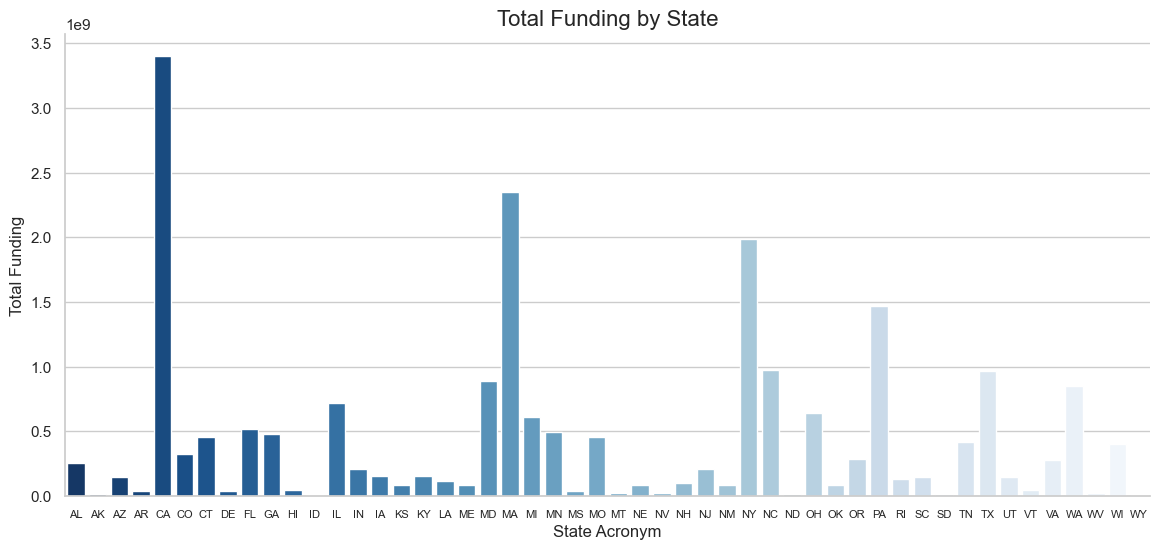

In [524]:
# Create bar plot
sns.set(style="whitegrid", rc={'figure.figsize':(14,6)})

ax = sns.barplot(
    data=us_funding, 
    x="State Acronym", 
    y="Total Funding", 
    hue="State Acronym",  # Assign x variable to hue
    palette="Blues_r", 
    legend=False)  # Remove redundant legend

ax.tick_params(axis='x', labelsize=8)
ax.set_xlabel("State Acronym", fontsize=12) # Label x axis
ax.set_ylabel("Total Funding", fontsize=12) # Label y axis
ax.set_title("Total Funding by State", fontsize=16)
sns.despine() # Remove top and right spines


12. Load the ‘papers.csv’ file to a DataFrame. This file contains number of papers published and support year for a sample of 5,000 records from the ‘nih-Worldwide2015.xls’ file. (15 points)

In [527]:
# Load "papers.csv" data
papers = pd.read_csv("papers.csv")

# Merge datasets to add Funding column
merged_df = papers.merge(nih_data[['Project Number', 'Funding']], on='Project Number', how='left')

display(merged_df)

,Project Number,year,papersNum,Funding
0,5R01NS082746-03,3,3,318529
1,5R01AI041576-18,18,0,399221
2,5R01EY025102-02,2,0,189262
3,3R01CA166588-04S1,4,0,78917
4,5R01CA158598-04,4,0,544193
...,...,...,...,...
4995,5R01GM107287-02,2,0,325070
4996,2R01AA019443-06A1,6,0,360521
4997,5R01DC001919-23,23,0,350274
4998,3R01HL110068-03S1,3,0,46905


13. Draw a scatter plot with Seaborn with ‘Funding’ in the x-axis and ‘papersNum’ in the y-axis. (10 points)

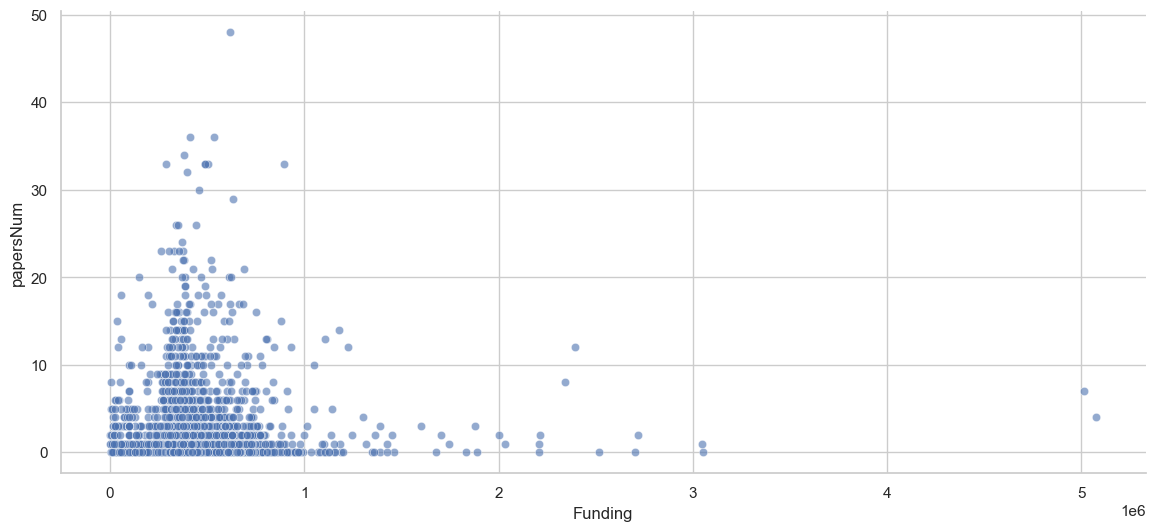

In [530]:
# Create scatter plot
sns.set(style="whitegrid", rc={'figure.figsize':(14, 6)})
sns.scatterplot(data=merged_df, x='Funding', y='papersNum', alpha=0.6)
sns.despine()

14. Now run a linear regression model adjusted for support year to evaluate whether there exists a relationship between the funding amount and the number of papers produced. You may use statsmodels library to run an ordinary least square model as follows. (25 points)

In [533]:
data_reg = merged_df[['year', 'Funding', 'papersNum']]
data_reg = sm.add_constant(data_reg)
lsmod = sm.OLS(data_reg['papersNum'], data_reg[['const', 'year', 'Funding']]).fit()
lsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              papersNum   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     16.45
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           7.54e-08
Time:                        16:12:25   Log-Likelihood:                -13145.
No. Observations:                5000   AIC:                         2.630e+04
Df Residuals:                    4997   BIC:                         2.631e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0150      0.109      9.303      0.000       0.801       1.229
year           0.0357      0.007      5.034      0.000       0.022       0.050
Funding     5.728e-07   2.14e-07      2.675      0.007    1.53e-07    9.93e-07
==============================================================================
Omnibus:                     4918.989   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           255684.936
Skew:                           4.828   Prob(JB):                         0.00
Kurtosis:                      36.676   Cond. No.                     1.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""